In [26]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from filt_plot_funcs import *


In [27]:
fs = 200

### DAQ Filter

In [28]:
b, a = signal.iirfilter(N = 4, Wn = 40, btype="lowpass", ftype='butter', fs=fs)
b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")


b = [0.04658291 0.18633163 0.27949744 0.18633163 0.04658291]
a = [ 1.         -0.7820952   0.67997855 -0.1826757   0.03011888]


In [29]:
sos = signal.tf2sos(b, a).astype(dtype=np.float16)

print(f"Unformatted:\n{sos}")
print(f"\nFormatted:", end='')
for section_num in range(np.shape(sos)[0]):
    print("\n")
    for coeff in range(np.shape(sos)[1]):
        print(sos[section_num][coeff], end=", ")

Unformatted:
[[ 0.04657  0.09314  0.04657  1.      -0.3289   0.0646 ]
 [ 1.       2.       1.       1.      -0.4531   0.4663 ]]

Formatted:

0.04657, 0.09314, 0.04657, 1.0, -0.3289, 0.0646, 

1.0, 2.0, 1.0, 1.0, -0.4531, 0.4663, 

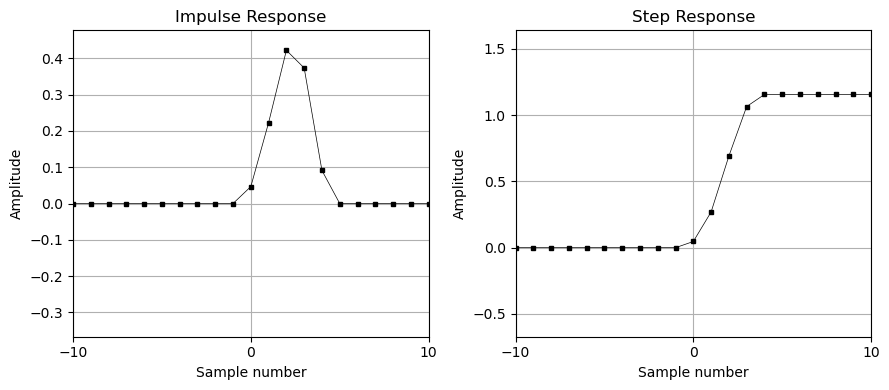

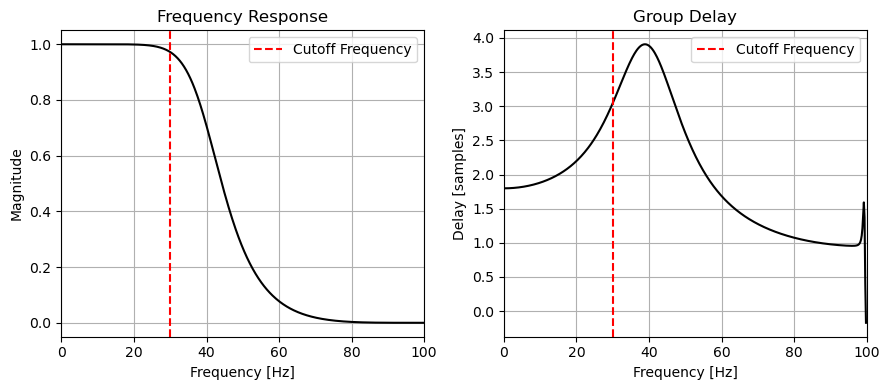

<Figure size 640x480 with 0 Axes>

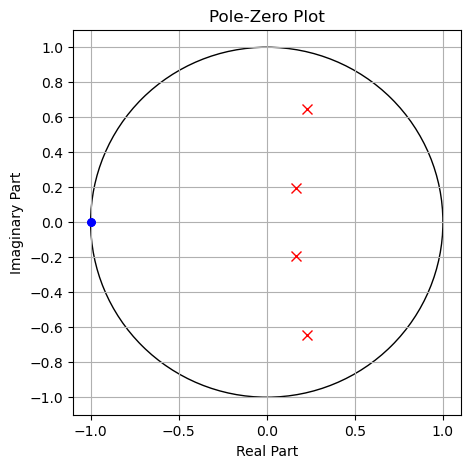

In [30]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)

### QRS LPF

In [31]:
b, a = signal.iirfilter(N=2, Wn=20, btype='lowpass', ftype='butter', fs=fs)
b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")


b = [0.06745528 0.13491055 0.06745528]
a = [ 1.        -1.1429805  0.4128016]


In [32]:
sos = signal.tf2sos(b, a).astype(dtype=np.float16)

print(f"Unformatted:\n{sos}")
print(f"\nFormatted:", end='')
for section_num in range(np.shape(sos)[0]):
    print("\n")
    for coeff in range(np.shape(sos)[1]):
        print(sos[section_num][coeff], end=", ")

Unformatted:
[[ 0.06744  0.1349   0.06744  1.      -1.143    0.4128 ]]

Formatted:

0.06744, 0.1349, 0.06744, 1.0, -1.143, 0.4128, 

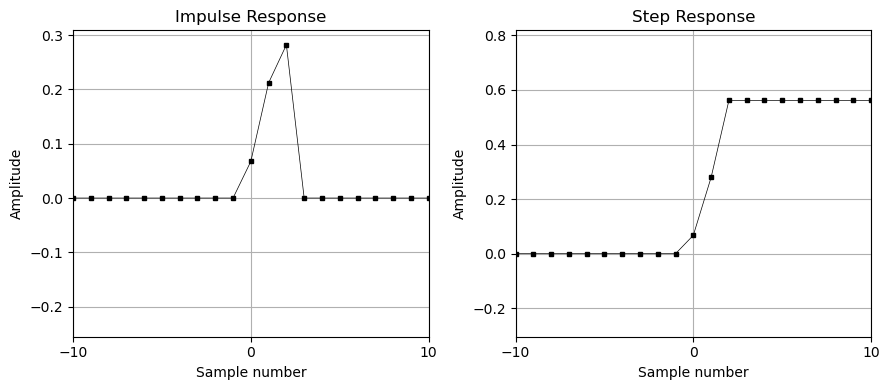

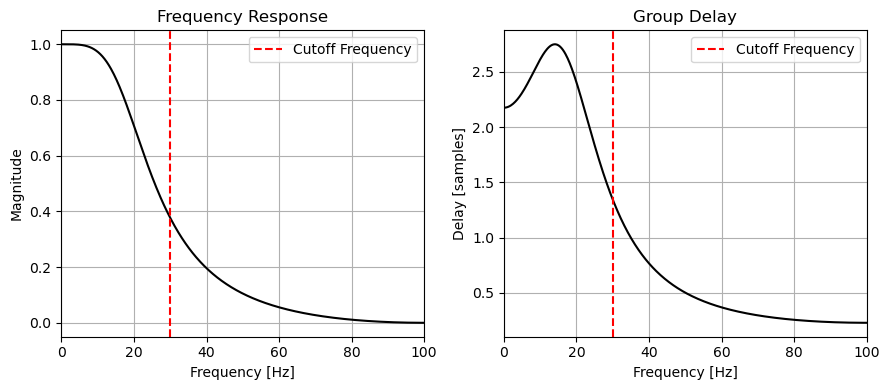

<Figure size 640x480 with 0 Axes>

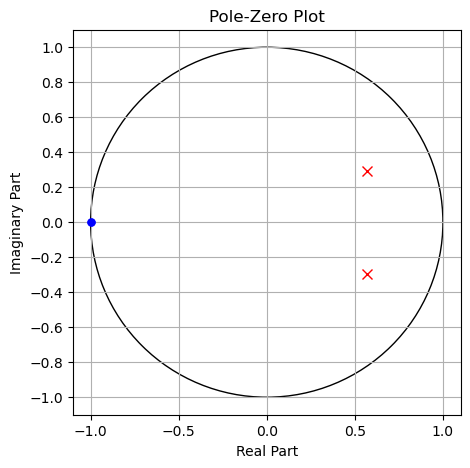

In [33]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)

### QRS HPF

In [34]:
b, a = signal.iirfilter(N=2, Wn=12, btype='highpass', ftype='butter', fs=fs)
b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")


b = [ 0.76559997 -1.5311999   0.76559997]
a = [ 1.        -1.4754804  0.5869195]


In [35]:
sos = signal.tf2sos(b, a).astype(dtype=np.float16)

print(f"Unformatted:\n{sos}")
print(f"\nFormatted:", end='')
for section_num in range(np.shape(sos)[0]):
    print("\n")
    for coeff in range(np.shape(sos)[1]):
        print(sos[section_num][coeff], end=", ")

Unformatted:
[[ 0.7656 -1.531   0.7656  1.     -1.476   0.587 ]]

Formatted:

0.7656, -1.531, 0.7656, 1.0, -1.476, 0.587, 

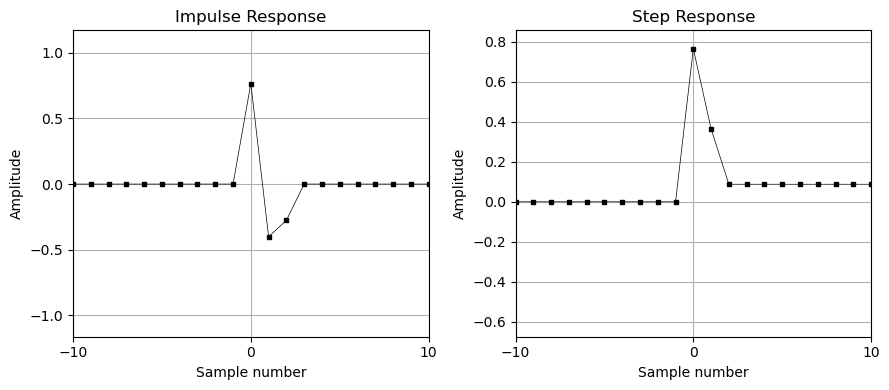

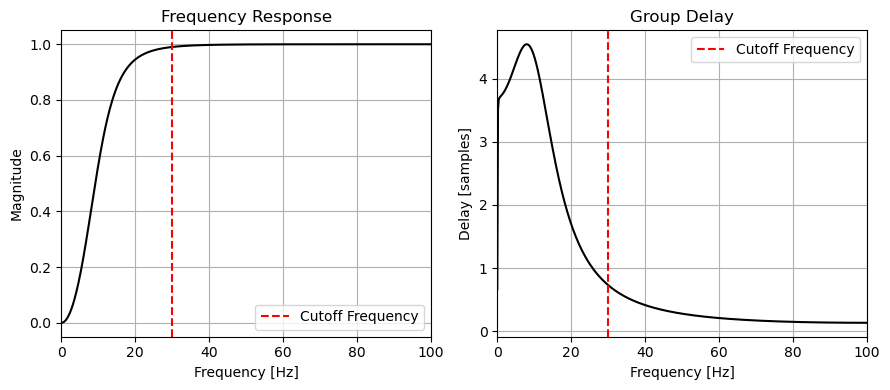

<Figure size 640x480 with 0 Axes>

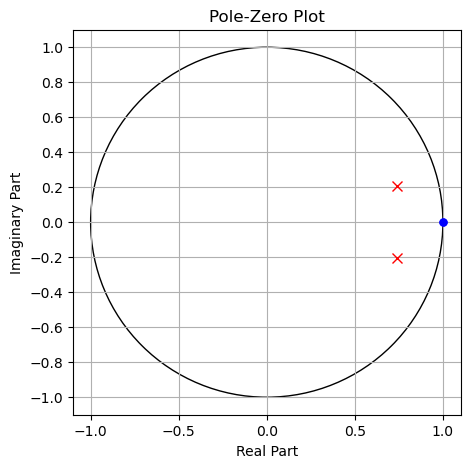

In [36]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)

### QRS Derivative Filter

In [37]:
b = np.array( [1, 2, 0, -2, -1] ) / 8
a = np.zeros(np.shape(b))
a[0] = 1

b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")

b = [ 0.125  0.25   0.    -0.25  -0.125]
a = [1. 0. 0. 0. 0.]


In [38]:
sos = signal.tf2sos(b, a).astype(dtype=np.float16)

print(f"Unformatted:\n{sos}")
print(f"\nFormatted:", end='')
for section_num in range(np.shape(sos)[0]):
    print("\n")
    for coeff in range(np.shape(sos)[1]):
        print(sos[section_num][coeff], end=", ")

Unformatted:
[[ 1.25e-01  2.50e-01  1.25e-01  1.00e+00  0.00e+00  0.00e+00]
 [ 1.00e+00 -2.62e-06 -1.00e+00  1.00e+00  0.00e+00  0.00e+00]]

Formatted:

0.125, 0.25, 0.125, 1.0, 0.0, 0.0, 

1.0, -2.6e-06, -1.0, 1.0, 0.0, 0.0, 

/Users/bryanmcelvy/opt/anaconda3/envs/ml_ds/lib/python3.8/site-packages/scipy/signal/_filter_design.py:693: RuntimeWarning: divide by zero encountered in divide
  gd = np.real(num / den) - a.size + 1
/Users/bryanmcelvy/opt/anaconda3/envs/ml_ds/lib/python3.8/site-packages/scipy/signal/_filter_design.py:693: RuntimeWarning: invalid value encountered in divide
  gd = np.real(num / den) - a.size + 1
/Users/bryanmcelvy/Documents/project_dir/ecg_hrm/tools/filter_design/filt_plot_funcs.py:117: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  freq, grd = signal.group_delay([b, a], N, fs=fs)


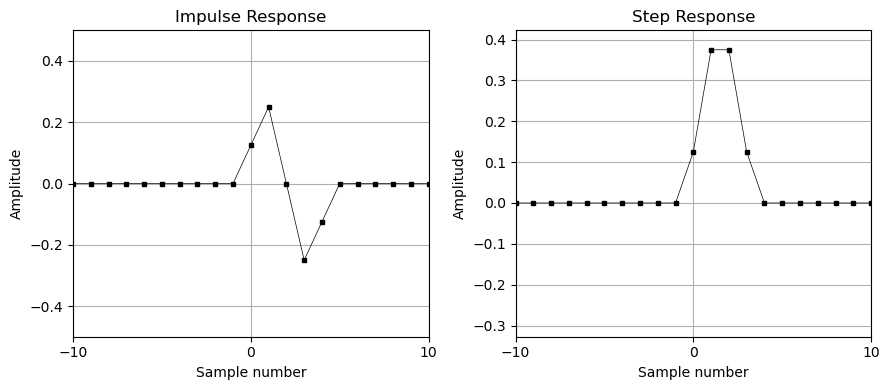

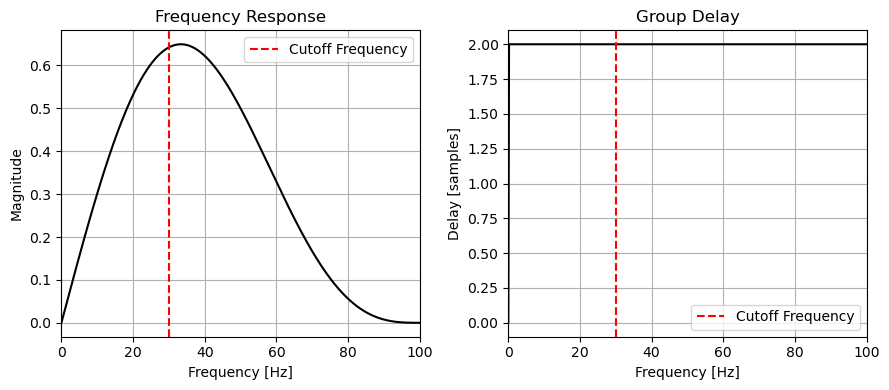

<Figure size 640x480 with 0 Axes>

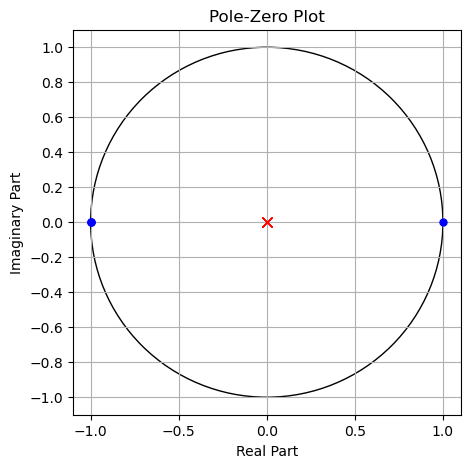

In [39]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)

### QRS MA Filter

In [15]:
M = 15
b = np.ones(M) / M
a = np.zeros(np.shape(b))
a[0] = 1

b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")

b = [0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]
a = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
sos = signal.tf2sos(b, a).astype(dtype=np.float16)

print(f"Unformatted:\n{sos}")
print(f"\nFormatted:\n", end='')

for idx, coeff in enumerate(b):
    print(coeff, end='')
    if idx != (len(b) - 1):
        print(", ", end='')

# for section_num in range(np.shape(sos)[0]):
#     print("\n")
#     for coeff in range(np.shape(sos)[1]):
#         print(sos[section_num][coeff], end=", ")

Unformatted:
[[ 0.06665 -0.0412   0.06665  1.       0.       0.     ]
 [ 1.       1.956    1.       1.       0.       0.     ]
 [ 1.       0.2091   1.       1.       0.       0.     ]
 [ 1.       1.618    1.       1.       0.       0.     ]
 [ 1.      -1.338    1.       1.       0.       0.     ]
 [ 1.       1.       1.       1.       0.       0.     ]
 [ 1.      -1.827    1.       1.       0.       0.     ]]

Formatted:
0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667

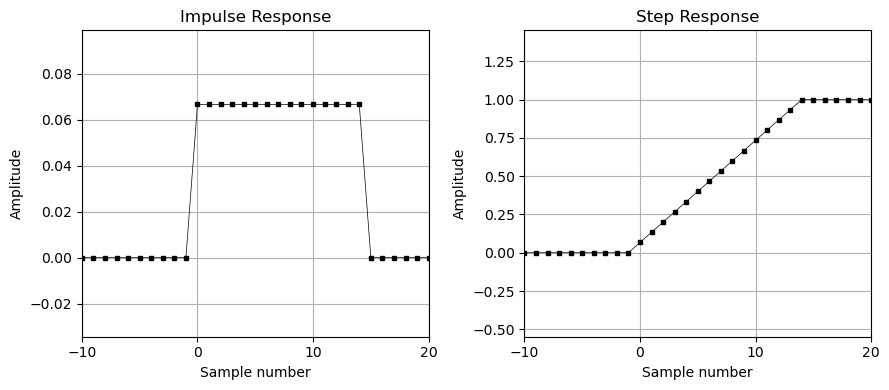

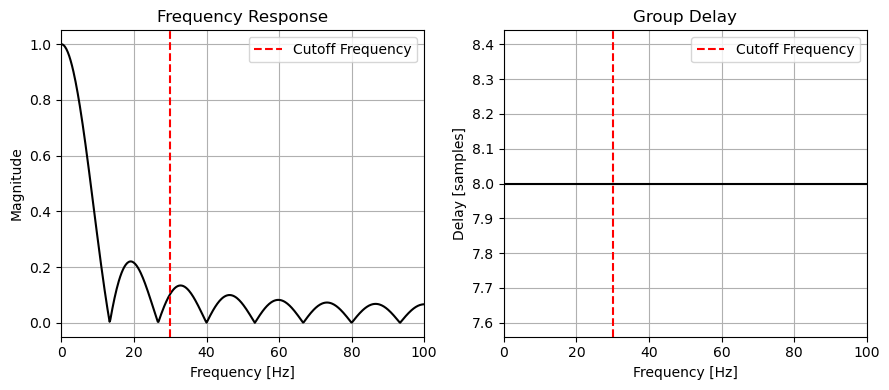

<Figure size 640x480 with 0 Axes>

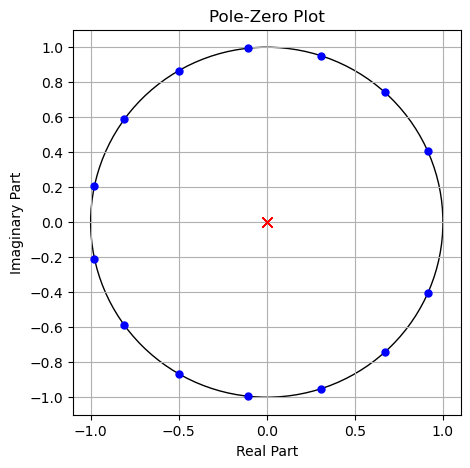

In [17]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)